In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 300)

import numpy as np
np.random.seed(1)
import os
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import re

# Global variables
N_TOPICS = 10
HOW_MANY_TERMS = 10
PATH = './data/'

os.listdir(PATH)

['01.txt',
 '02.txt',
 '03.txt',
 '04.txt',
 '05.txt',
 '06.txt',
 '07.txt',
 '08.txt',
 '09.txt',
 '10.txt',
 '11.txt',
 '12.txt',
 '13.txt',
 '14.txt',
 '15.txt',
 '16.txt',
 '17.txt',
 '18.txt',
 '19.txt',
 '20.txt',
 '21.txt',
 '22.txt',
 '23.txt',
 '24.txt',
 '25.txt',
 '26.txt',
 '27.txt',
 '28.txt',
 '29.txt',
 '30.txt',
 '31.txt',
 '32.txt',
 '33.txt',
 '34.txt',
 '35.txt',
 '36.txt',
 '37.txt',
 '38.txt',
 '39.txt',
 '40.txt',
 '41.txt',
 '42.txt',
 '43.txt',
 '44.txt',
 '45.txt',
 '46.txt',
 '47.txt',
 '48.txt',
 '49.txt',
 '50.txt',
 '51.txt',
 '52.txt',
 '53.txt',
 '54.txt',
 '55.txt',
 '56.txt',
 '57.txt',
 '58.txt',
 '59.txt',
 '60.txt',
 '61.txt',
 '62.txt',
 '63.txt']

In [2]:
df_csv = pd.read_csv('merged_dataset_labeled_revised.csv').drop('Unnamed: 0',axis=1)
df_csv['social_sciences?'] = df_csv['social_sciences?'].astype(bool)
df_csv['international_migration?'] = df_csv['international_migration?'].astype(bool) 
print(df_csv.shape)
df_csv.head(2)

(671, 8)


,social_sciences?,international_migration?,authors,title,year,journal,affiliations,abstract
0,False,False,"Countryman C.E., Steinberg D.K., Burd A.B.",Modelling The Effects Of Copepod Diel Vertical Migration And Community Structure On Ocean Carbon Flux Using An Agent-Based Model,2022,Ecological Modelling,"Department of Marine Sciences, University of Georgia, Athens, GA, United States; Department of Biological Sciences, Virginia Institute of Marine Science, William & Mary, Gloucester Point, VA, United States","Fecal pellets are a significant component of total particulate organic carbon (POC) flux in the ocean and a key component of the biological pump. The effect of copepod community structure, feeding behavior, and diel vertical migration (DVM) on fecal pellet carbon flux was investigated using an a..."
1,True,False,"Akopov A.S., Beklaryan L.A., Beklaryan A.L.",Multisector Bounded-Neighborhood Model: Agent Segregation And Optimization Of Environment’S Characteristics,2022,Mathematical Models and Computer Simulations,"Central Economics and Mathematics Institute, Russian Academy of Sciences, Moscow, Russian Federation; National Research University Higher School of Economics, Moscow, Russian Federation",Abstract: An approach is presented to study the effects of segregation using the developed multisector bounded-neighborhood model. A model of the evolutionary dynamics of a community consisting of local (indigenous) and external (migrants) populations interacting in an artificial socioeconomic s...


In [3]:
mask = (df_csv['social_sciences?'] == True) & df_csv['international_migration?'] == True
df_csv[mask].shape

(63, 8)

In [4]:
df_metadata = df_csv[mask]
df_metadata.reset_index(inplace=True)
df_metadata.drop("index",axis=1,inplace=True)

C:\Users\GDeLuca\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
df = pd.DataFrame()

all_texts = []
for filename in os.listdir(PATH):
#     print(filename)
    with open(PATH+filename,'r',encoding='UTF-8') as handle:
        text = handle.read()
        text = text.lower()
        text = text.replace('introduction', ' ').replace('\n', ' ')
    all_texts.append(text)
df['text'] = all_texts

In [6]:
pd.DataFrame({'authors':df_metadata['authors'],'title':df_metadata['title'],'abstract':df_metadata['abstract'],'text':df['text']})

,authors,title,abstract,text
0,"Gursoy F., Badur B.",An Agent-Based Modeling Approach To Brain Drain,"The phenomenon of brain drain, which is the emigration of highly skilled people, has many undesirable effects, particularly for developing countries. In this study, an agent-based model is developed to understand the dynamics of such emigration. We hypothesize that skilled people's emigration de...","1 brain drain can be defined as the emigration of highly skilled or qualified people from a particular country. it has many undesirable effects for the home (i.e., source, sender) countries since the loss of human capital damages the economic and social development [1], [2]. on the other hand,..."
1,"Suleimenova D., Arabnejad H., Edeling W.N., Groen D.",Sensitivity-Driven Simulation Development: A Case Study In Forced Migration,"This paper presents an approach named sensitivity-driven simulation development (SDSD), where the use of sensitivity analysis (SA) guides the focus of further simulation development and refinement efforts, avoiding direct calibration to validation data. SA identifies assumptions that are particu...","1. in recent decades, the use of simulations has become prominent across disciplines, particularly in physics, engineering, economics and computer science. researchers develop models to investigate, analyse and predict the behaviour and the outcome of real or physical processes and systems [1..."
2,"McAlpine A., Kiss L., Zimmerman C., Chalabi Z.",Agent-Based Modeling For Migration And Modern Slavery Research: A Systematic Review,This systematic review aims to synthesize how agent-based modeling (ABM) has been used in migration and modern slavery research and provide the basis to model development for social science researchers exploring the use of ABM. We searched five bibliographic databases using two terminology categ...,"this review aims to explore how agent-based modeling (abm), a complex systems science method, has been applied to research on migration or modern slavery, and to synthesize the abm model development in this field of study to inform future applications of these methods. abm, particularly in re..."
3,Dyble M.,The Evolution Of Altruism Through War Is Highly Sensitive To Population Structure And To Civilian And Fighter Mortality,"The importance of warfare in the evolution of human social behavior remains highly debated. One hypothesis is that intense warfare between groups favored altruism within groups, a hypothesis given some support by computational modeling and, in particular, the work of Choi and Bowles [J.-K. Choi,...","while humans are capable of cooperation, tolerance, and generosity toward others, we are also capable of prejudice, violence, and war. although superficially at odds, these two sides of human behavior are sometimes closely related, with warfare promoting within-group solidarity and acts of indiv..."
4,"Oleynik E.B., Ivashina N.V., Shmidt Yu.D.",Migration Processes Modelling: Methods And Tools (Overview) [Моделирование Процессов Миграции Населения: Методы И Инструменты (Обзор)],"Migration has a significant impact on the shaping of the demographic structure of the territories population, the state of regional and local labour markets. As a rule, rapid change in the working-age population of any territory due to migration processes results in an imbalance in supply and de...","1224 е. б. олейник, н. в. ивашина, ю. д. шмидт онных систем. такой синтез дает возможность использовать преимущества сразу нескольких инструментов. таблица 2. особенности моделирования миграционных потоков характеристика миграционных моделей преимущества недостатки регрессионные модели использую..."
5,"Jahani A., Arabnejad H., Suleimanova D., Vuckovic M., Mahmood I., Groen D.",Towards A Coupled Migration And Weather Simulation: South Sudan Conflict,"Multiscale simulations present a new approach to increase the level of accuracy in terms of forced displacement forecasting, which can help humanitarian aid

In [7]:
documents_to_drop = [4,22,32,33, 59,61]
df_processed = df_metadata.drop(documents_to_drop).reset_index().drop('index',axis=1)
df_processed['text'] = df.drop(documents_to_drop).reset_index().drop('index',axis=1)['text']
df_processed

,social_sciences?,international_migration?,authors,title,year,journal,affiliations,abstract,text
0,True,True,"Gursoy F., Badur B.",An Agent-Based Modeling Approach To Brain Drain,2022,IEEE Transactions on Computational Social Systems,"Department of Management Information Systems, Boǧaziçi University, Istanbul, 34342, Turkey","The phenomenon of brain drain, which is the emigration of highly skilled people, has many undesirable effects, particularly for developing countries. In this study, an agent-based model is developed to understand the dynamics of such emigration. We hypothesize that skilled people's emigration de...","1 brain drain can be defined as the emigration of highly skilled or qualified people from a particular country. it has many undesirable effects for the home (i.e., source, sender) countries since the loss of human capital damages the economic and social development [1], [2]. on the other hand,..."
1,True,True,"Suleimenova D., Arabnejad H., Edeling W.N., Groen D.",Sensitivity-Driven Simulation Development: A Case Study In Forced Migration,2021,"Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences","Department of Computer Science, Brunel University London, London, United Kingdom; Centrum Wiskunde and Informatica, Amsterdam, Netherlands; Centre for Computational Science, University College London, London, United Kingdom","This paper presents an approach named sensitivity-driven simulation development (SDSD), where the use of sensitivity analysis (SA) guides the focus of further simulation development and refinement efforts, avoiding direct calibration to validation data. SA identifies assumptions that are particu...","1. in recent decades, the use of simulations has become prominent across disciplines, particularly in physics, engineering, economics and computer science. researchers develop models to investigate, analyse and predict the behaviour and the outcome of real or physical processes and systems [1..."
2,True,True,"McAlpine A., Kiss L., Zimmerman C., Chalabi Z.",Agent-Based Modeling For Migration And Modern Slavery Research: A Systematic Review,2021,Journal of Computational Social Science,"Gender Violence and Health Centre, Faculty of Public Health and Policy, London School of Hygiene and Tropical Medicine, London, United Kingdom; Institute for Global Health, Faculty of Population Health Sciences, University College London, London, United Kingdom; The Bartlett School of Environmen...",This systematic review aims to synthesize how agent-based modeling (ABM) has been used in migration and modern slavery research and provide the basis to model development for social science researchers exploring the use of ABM. We searched five bibliographic databases using two terminology categ...,"this review aims to explore how agent-based modeling (abm), a complex systems science method, has been applied to research on migration or modern slavery, and to synthesize the abm model development in this field of study to inform future applications of these methods. abm, particularly in re..."
3,True,True,Dyble M.,The Evolution Of Altruism Through War Is Highly Sensitive To Population Structure And To Civilian And Fighter Mortality,2021,Proceedings of the National Academy of Sciences of the United States of America,"Department of Anthropology, University College London, London, WC1H 0BW, United Kingdom","The importance of warfare in the evolution of human social behavior remains highly debated. One hypothesis is that intense warfare between groups favored altruism within groups, a hypothesis given some support by computational modeling and, in particular, the work of Choi and Bowles [J.-K. Choi,...","while humans are capable of cooperation, tolerance, and generosity toward others, we are also capable of prejudice, violence, and war. although superficially at odds, these two sides of human behavior are sometimes closely related, with warfare promoting within-group solidarity and ac

In [8]:
stop_words = stopwords.words('english')
with open('./resources/stop_words.txt','r',encoding='UTF-8') as handle:
    [stop_words.append(x) for x in handle.read().split()]

stemmer = SnowballStemmer('english')

stems = dict()

stemmed_texts = []
PATTERNS = ['[a-zA-Z-]{2,}']
for row in df_processed.iterrows():

    row_text = row[1]['text'].lower()
    all_tokens = []
#################################################################
    # This iterates as many times as the number of elements in the list of regex patterns PATTERNS
    # It's greedy

    for pattern in PATTERNS:
        tokens_found = re.findall(pattern,row_text)
        [all_tokens.append(token) for token in tokens_found]
#         print(all_tokens) # only for debugging
        for i,token in enumerate(tokens_found):
            row_text.replace(token,' ')
            # FOR DEBUGGING
            if token == 'co':
                print(tokens_found[i-5:i+5])
#################################################################
    all_stems = []
    for token in all_tokens:
        if token not in stop_words:
            stemmed = stemmer.stem(token)
            all_stems.append(stemmed)
            if stemmed not in stems.keys():
                stems[stemmed] = [token]
            elif token not in stems[stemmed]:
                stems[stemmed].append(token)
    stemmed_texts.append(' '.join(all_stems))
df_stemmed = pd.DataFrame()
df_stemmed['stemmed'] = stemmed_texts
print('Done')

Done


In [9]:
# df_stemmed['stemmed'].head()

In [10]:
stems

{'brain': ['brain'],
 'drain': ['drain'],
 'defin': ['defined', 'define', 'defines', 'defining'],
 'emigr': ['emigration',
  'emigrated',
  'emigrating',
  'emigrate',
  'emigrants',
  'emigrant'],
 'high': ['highly', 'high', 'highs'],
 'skill': ['skilled', 'skills', 'skill'],
 'qualifi': ['qualified', 'qualify'],
 'peopl': ['people', 'peoples', 'peopling'],
 'particular': ['particular', 'particularly'],
 'countri': ['country', 'countries'],
 'mani': ['many'],
 'undesir': ['undesirable'],
 'effect': ['effects',
  'effect',
  'effective',
  'effectiveness',
  'effectively',
  'effected'],
 'home': ['home', 'homes'],
 'sourc': ['source', 'sources', 'sourced'],
 'sender': ['sender'],
 'sinc': ['since'],
 'loss': ['loss', 'losses'],
 'human': ['human', 'humans', 'humanity', 'humanism'],
 'capit': ['capital', 'capitalized', 'capitalize', 'capitalism'],
 'damag': ['damages', 'damage'],
 'econom': ['economic', 'economical', 'economics', 'economically'],
 'social': ['social',
  'socially',
  '

In [11]:
vectorizer = CountVectorizer(stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')

M = vectorizer.fit_transform(df_stemmed['stemmed'])

n_topics = N_TOPICS
lda = LDA(n_components=n_topics)
lda_matrix = lda.fit_transform(M)
features = vectorizer.get_feature_names()
components = lda.components_
results = pd.DataFrame(data=components, columns=features).T
results

C:\Users\GDeLuca\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['andr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,0,1,2,3,4,5,6,7,8,9
aalen,0.100000,0.1,0.100000,0.100000,0.100000,0.100000,1.100000,0.100000,0.1,0.100000
ab,0.100000,0.1,0.100000,0.100000,0.100000,0.100005,0.459152,0.100000,0.1,1.740843
abandon,0.100000,0.1,1.100000,0.100000,1.466650,2.412229,1.988711,0.532402,0.1,0.100007
abbat,0.100000,0.1,10.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.1,0.100000
abbrevi,0.100000,0.1,0.100000,0.100000,1.099855,0.100128,0.100000,0.100004,0.1,0.100013
...,...,...,...,...,...,...,...,...,...,...
zone,2.281134,0.1,10.052319,10.351617,4.173362,13.208055,6.600948,6.285674,0.1,16.846892
zoom,1.099978,0.1,0.100000,0.100000,0.100000,0.100013,0.100000,0.100004,0.1,0.100006
zor,0.100001,0.1,0.100000,0.100000,0.100000,0.100068,0.100002,1.099913,0.1,0.100016
zucha,0.100000,0.1,0.100000,0.100000,8.100000,0.100000,0.100000,0.100000,0.1,0.100000


from sklearn.manifold import TSNE
import seaborn as sns

model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features = model.fit_transform(lda_matrix)
df_new = pd.DataFrame(tsne_features)
df_new['topic'] = lda_matrix.argmax(axis=1)
df_new.columns = ['TSNE1', 'TSNE2', 'topic']

plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines (headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df_new, legend = 'full')
plt.show()

In [12]:
keywords = dict()
HOW_MANY_TERMS = 10
for topic in results.columns:
    print(f'### Topic n. {topic} ###')
    topic_keywords = results[topic].sort_values(ascending=False).head(HOW_MANY_TERMS)
    print(topic_keywords)
    keywords[topic] = topic_keywords.index.values

### Topic n. 0 ###
new       212.844387
migrat    200.351982
citi      195.246164
group     189.506886
agent     181.565789
model     160.361972
resid     158.944454
social    130.743734
plan      118.111598
urban     107.899595
Name: 0, dtype: float64
### Topic n. 1 ###
migrat       202.533011
agent        155.336723
unauthor      95.100000
migrant       91.507244
scientist     86.634480
model         84.936490
polici        76.763701
channel       74.100008
locat         73.254878
restrict      69.793322
Name: 1, dtype: float64
### Topic n. 2 ###
agent          459.917768
model          440.244500
popul          299.053973
dispers        225.984804
resourc        205.313294
data           186.837887
pastoralist    169.095320
variabl        150.256059
hominin        145.100000
environ        143.613676
Name: 2, dtype: float64
### Topic n. 3 ###
arctic       21.099999
migratori    14.733810
process      13.580926
problem      13.063117
robust       10.927490
model        10.866227
type

In [23]:
topics = keywords.keys()
for topic in topics:
    words = ''
#     print(f'### Topic n. {topic} ###')
    for value in keywords[topic]:
        if value in stems:
            label = stems[value][0]
        else:
            label = value
        words = words+', '+label
    print(words[2:])

new, migration, cities, groups, agents, modelling, residents, social, planned, urban
migration, agents, unauthorized, migrants, scientist, modelling, policies, channels, location, restricted
agents, modelling, population, dispersion, resources, data, pastoralist, variable, hominin, environments
arctic, migratory, process, problem, robustness, modelling, types, economic, dynamics, zone
modelling, population, data, households, simulation, useful, times, individual, areas, asian
modelling, refugees, agents, simulation, conflict, parameter, movements, country, data, displacement
modelling, migration, simulation, population, useful, agents, times, country, refugees, income
modelling, agents, violence, useful, simulation, ethnic, process, number, message, computer
migrants, migration, country, return, distribution, home, useful, modelling, border, number
modelling, agents, migration, useful, social, data, migrants, abm, simulation, study


In [14]:
probability_for_each_topic = lda.transform(M)
dataframe_topics = pd.DataFrame(probability_for_each_topic, columns=[i for i in range(N_TOPICS)])
dataframe_topics.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000056,0.000056,0.000056,0.000056,0.000056,0.029108,0.779803,0.000056,0.000056,0.190695
1,0.000029,0.000029,0.000029,0.000029,0.000029,0.999737,0.000029,0.000029,0.000029,0.000029
2,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.999849
3,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.999580
4,0.000885,0.000885,0.000885,0.000885,0.556455,0.436464,0.000885,0.000885,0.000885,0.000885


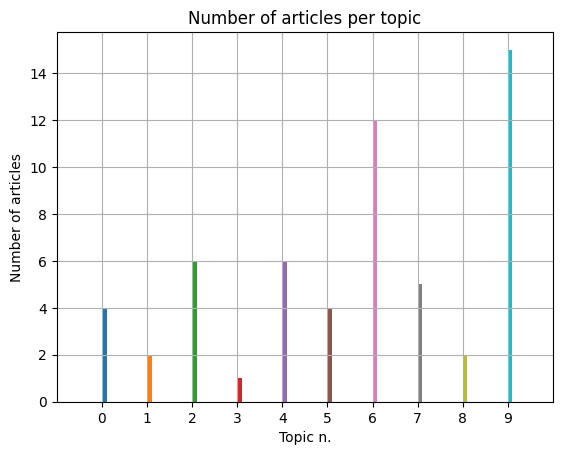

In [44]:
top_topic = dataframe_topics.idxmax(axis=1)
df_processed['topic'] = top_topic

top_topic.groupby(top_topic).hist()
plt.xticks(top_topic.unique())
plt.title('Number of articles per topic')
plt.xlabel('Topic n.')
plt.ylabel('Number of articles')
plt.show()

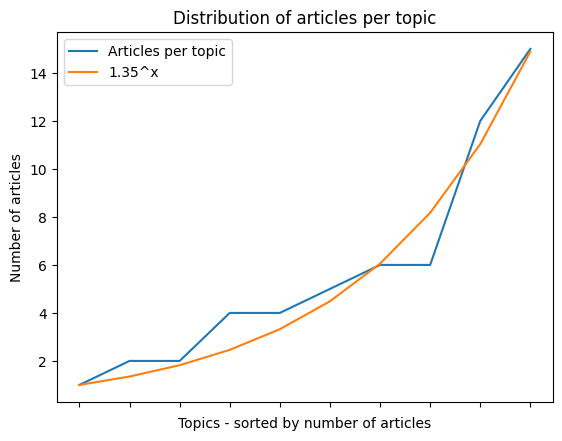

In [72]:
y = top_topic.groupby(top_topic).count().sort_values().values
x = np.array(range(len(y)))
plt.plot(x, y, label='Articles per topic')
plt.plot(x, 1.35**x, label='1.35^x') # <- the articles are distributed along
                     # the topics according to a power law more or less
plt.title('Distribution of articles per topic')
plt.xticks(range(0,10), [])
plt.xlabel('Topics - sorted by number of articles')
plt.ylabel('Number of articles')
plt.legend()
plt.show()

In [43]:
df_processed[['authors','title','topic']]

,authors,title,topic
0,"Gursoy F., Badur B.",An Agent-Based Modeling Approach To Brain Drain,6
1,"Suleimenova D., Arabnejad H., Edeling W.N., Groen D.",Sensitivity-Driven Simulation Development: A Case Study In Forced Migration,5
2,"McAlpine A., Kiss L., Zimmerman C., Chalabi Z.",Agent-Based Modeling For Migration And Modern Slavery Research: A Systematic Review,9
3,Dyble M.,The Evolution Of Altruism Through War Is Highly Sensitive To Population Structure And To Civilian And Fighter Mortality,9
4,"Jahani A., Arabnejad H., Suleimanova D., Vuckovic M., Mahmood I., Groen D.",Towards A Coupled Migration And Weather Simulation: South Sudan Conflict,4
5,"Termos A., Picascia S., Yorke-Smith N.",Agent-Based Simulation Of West Asian Urban Dynamics: Impact Of Refugees,6
6,"Searle C., van Vuuren J.H.",Modelling Forced Migration: A Framework For Conflict-Induced Forced Migration Modelling According To An Agent-Based Approach,5
7,"Bijak J., Higham P.A., Hilton J., Hinsch M., Nurse S., Prike T., Smith P.W.F., Reinhardt O., Uhrmacher A.M.","Modelling Migration: Decisions, Processes And Outcomes",2
8,"Nelson E.L., Khan S.A., Thorve S., Greenough P.G.",Modeling Pastoralist Movement In Response To Environmental Variables And Conflict In Somaliland: Combining Agent-Based Modeling And Geospatial Data,2
9,"Huang V., Unwin J.",Markov Chain Models Of Refugee Migration Data,9


In [17]:
G = nx.Graph()

topics = keywords.keys()
for topic in topics:
    G.add_node(topic)
    for value in keywords[topic]:
        if value in stems:
            label = stems[value][0]
        else:
            label = value
        G.add_node(label)
        G.add_edge(topic, label)

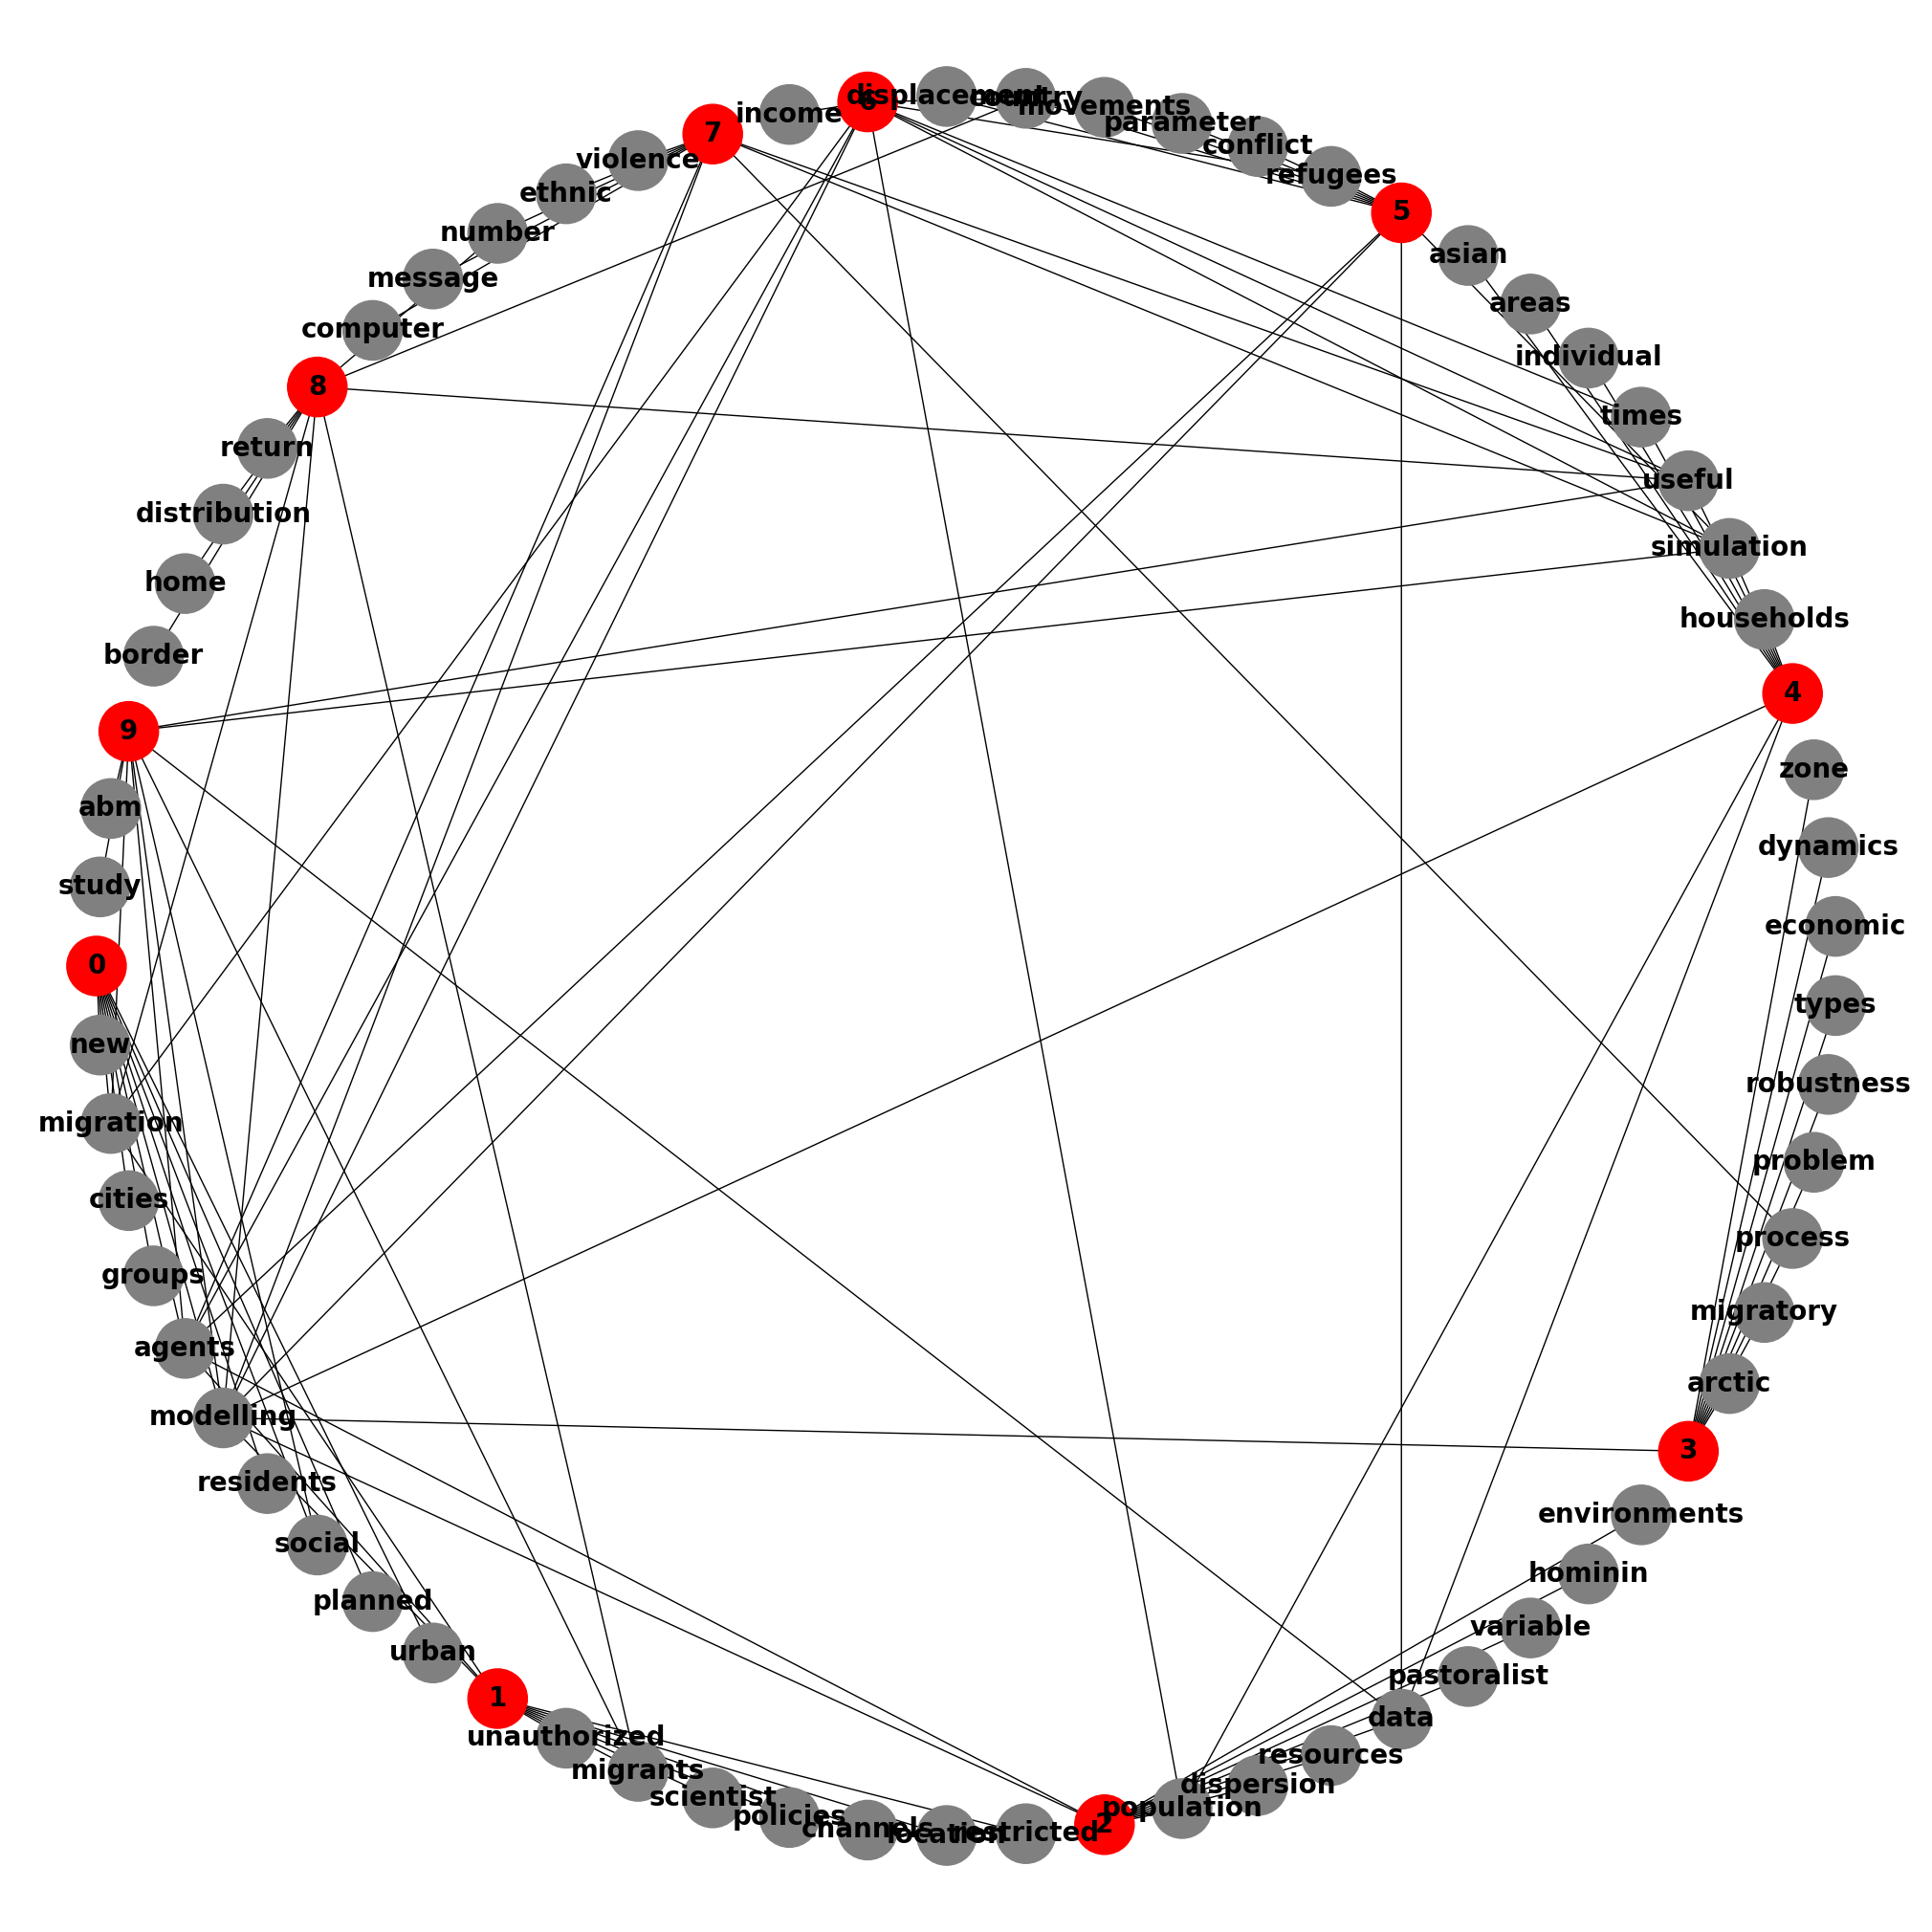

In [18]:
color_map = []
for current_node in G.nodes():
    if current_node in topics:
#         G.node[current_node]['viz'] = {'color':{'r': 255, 'g': 0, 'b': 0, 'a': 0}}
        color_map.append('red')
    else:
        color_map.append('gray')

plt.figure(figsize=(20,20))
nx.draw_shell(G, with_labels=True, font_weight='bold', font_size=20, 
#                width=2,
               node_color=color_map,
               node_size=2000
              )
plt.show()

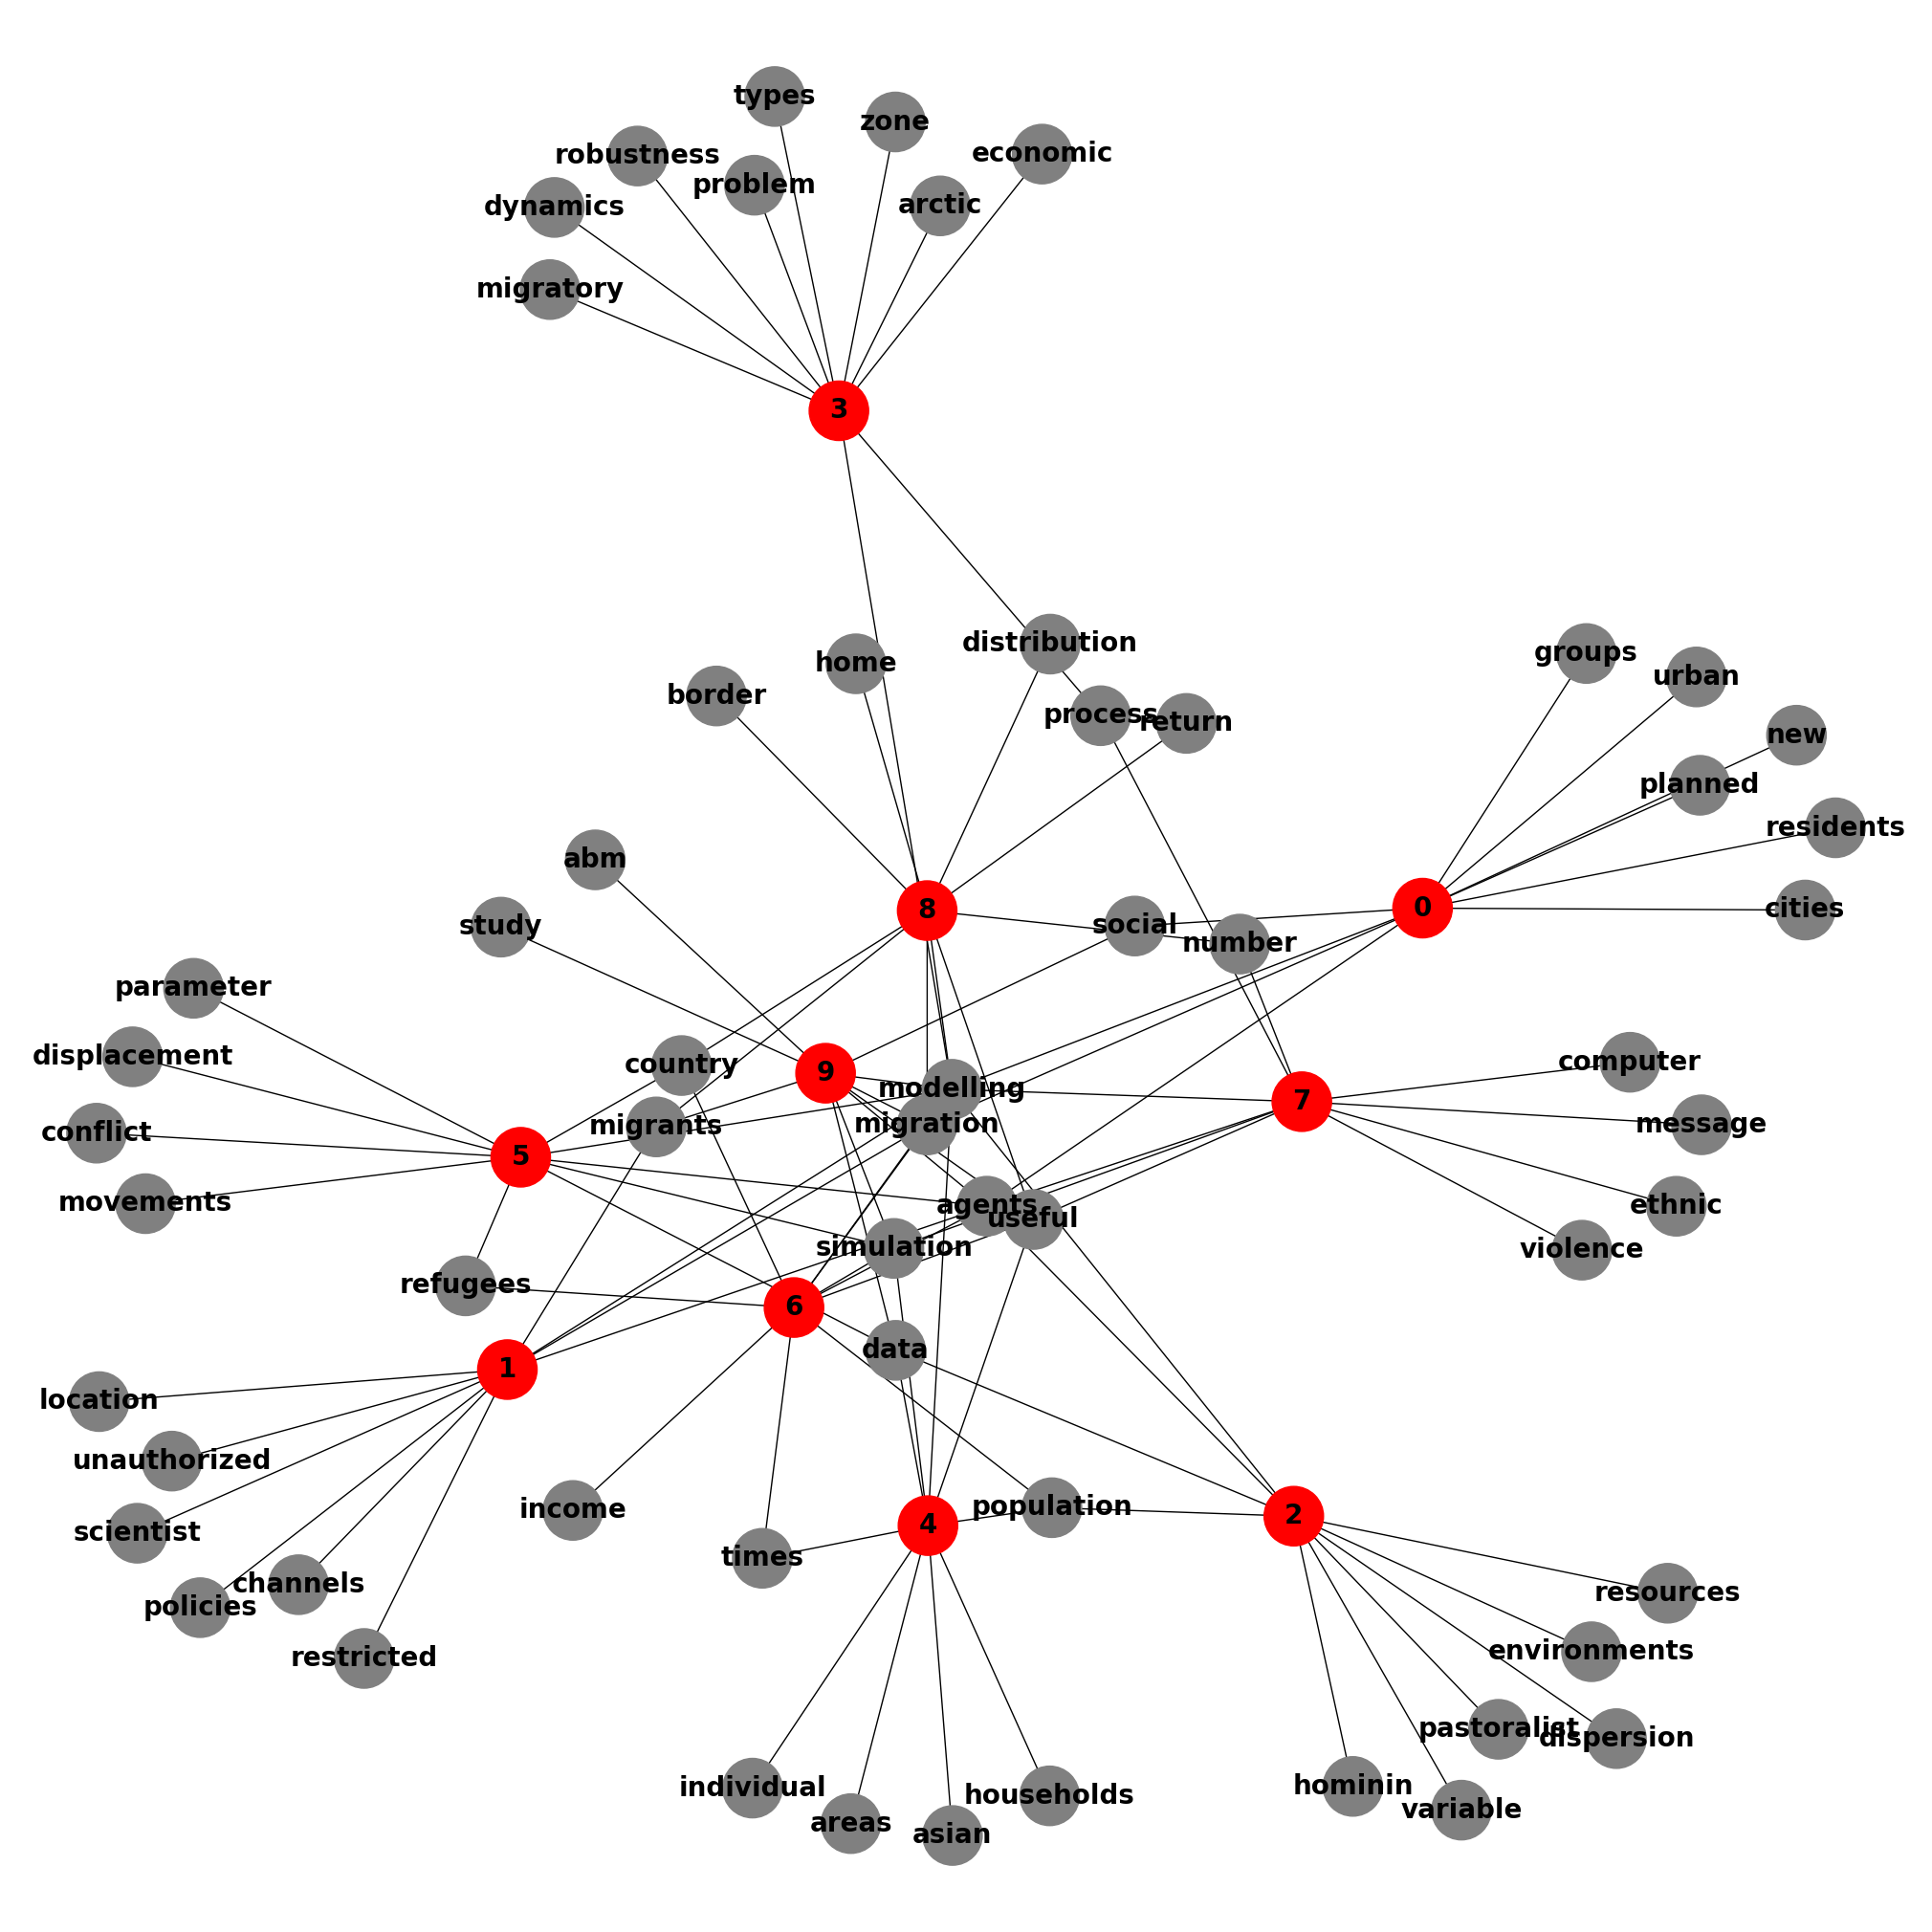

In [19]:
plt.figure(figsize=(20,20))
nx.draw_spring(G, with_labels=True, font_weight='bold', font_size=20, 
#                width=2,
               node_color=color_map,
               node_size=2000
              )
plt.show()

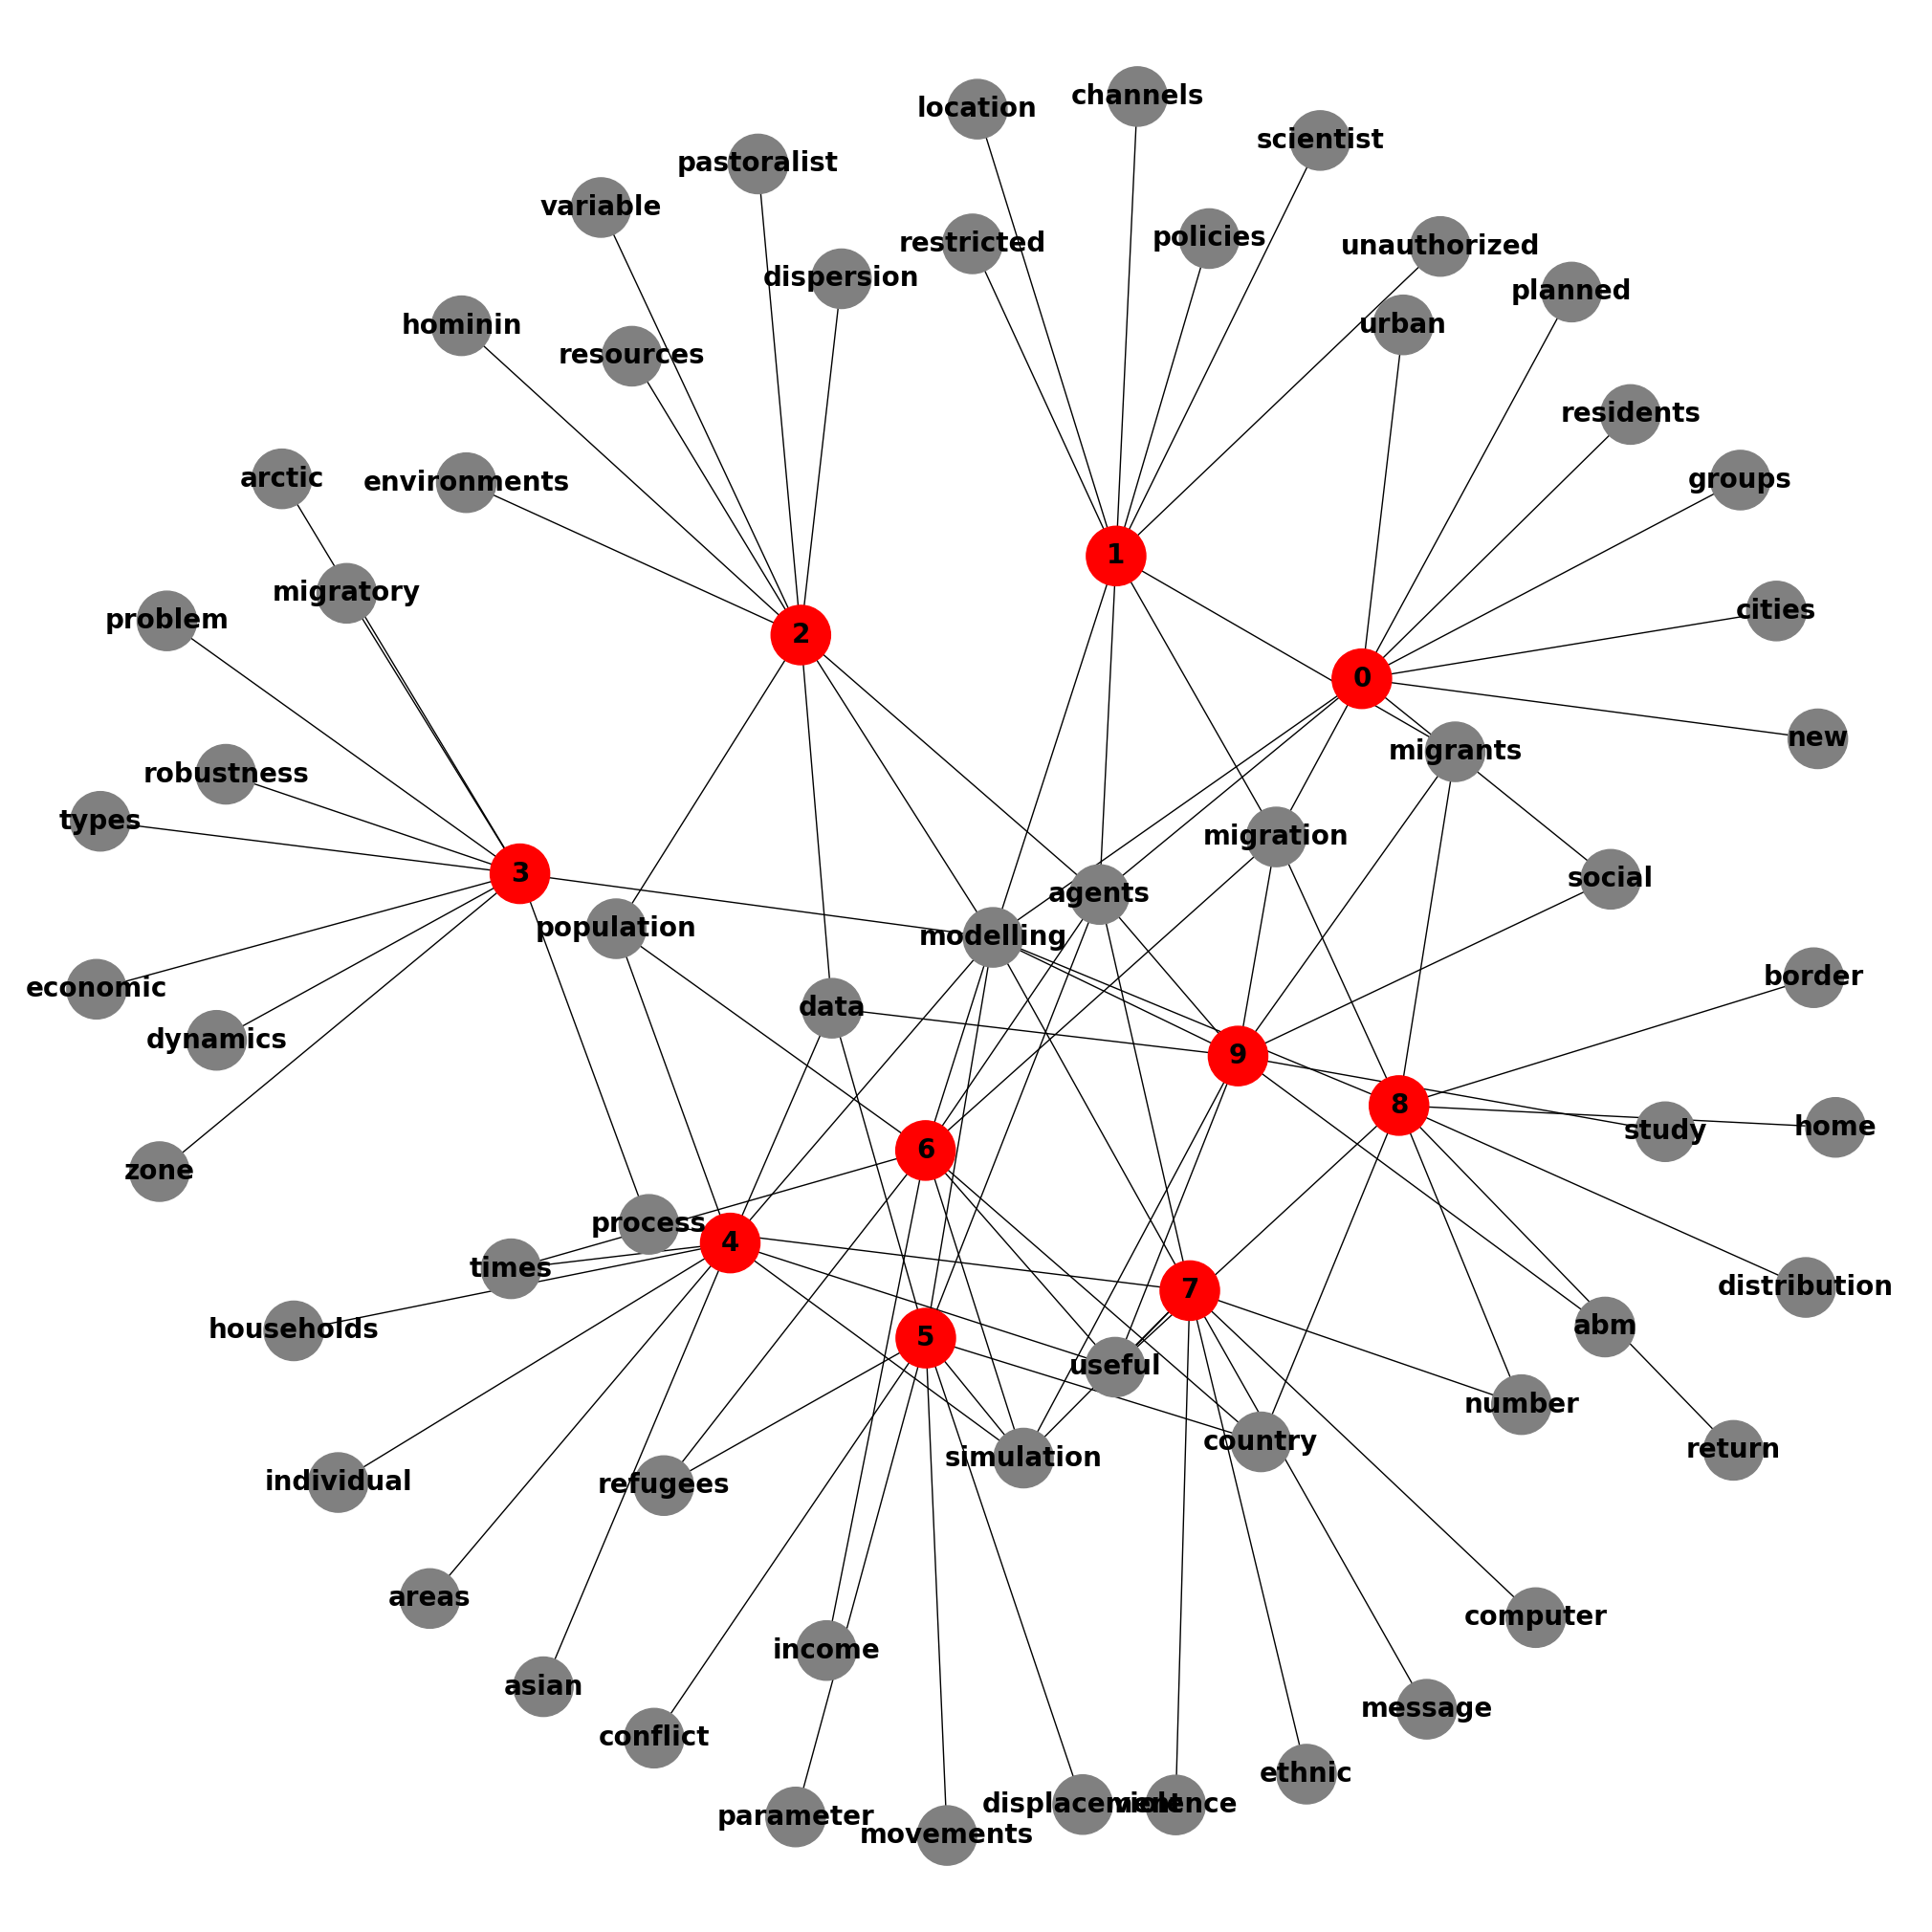

In [20]:
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(G, with_labels=True, font_weight='bold', font_size=20, 
#                width=2,
               node_color=color_map,
               node_size=2000
              )
plt.show()

In [21]:
nx.write_gexf(G, "LDA_literature_review.gexf")